# SMAI ASSIGNMENT 2 - Problem 4.3
## Srujana Vanka - 2020102005


In [22]:
import numpy as np
import pickle
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [25]:
# Load the dataset
with open('/home/sruj/Downloads/SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as file:
    dataset = pickle.load(file)
    
X = np.array(dataset).reshape(-1, 2)

# Given hat the dataset was generated from 7 distinct Gaussian color components, so number of components is set to 7
n_components = 7 

# Fit the GMM to the dataset
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(X)

# The GMM will estimate the parameters (means and covariances) for each component and assign each data point to one of the components.
# Extract the estimated means and covariances for each component
# These parameters represent the likely color components
labels = gmm.predict(X)
component_means = gmm.means_
component_covariances = gmm.covariances_


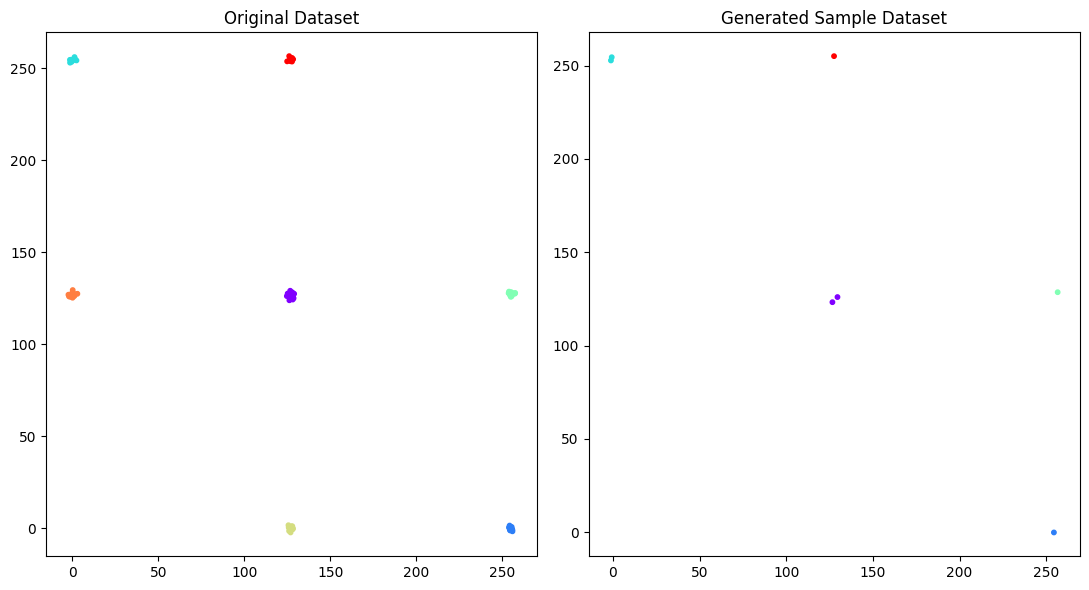

In [38]:
def generate_dataset(n, means, covariances):
    sample_data = []
    for i in range(n):
        # Randomly select a component
        component = np.random.randint(0, len(means))
        # Generate a random data point from the selected component's Gaussian distribution
        sample_point = np.random.multivariate_normal(means[component], covariances[component])
        sample_data.append(sample_point)
    return np.array(sample_data)


sample_dataset = generate_dataset(n_components, component_means, component_covariances)

# Plot the original and generated datasets
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=10)
plt.title('Original Dataset')

plt.subplot(1, 2, 2)
generated_labels = gmm.predict(sample_dataset) 
plt.scatter(sample_dataset[:, 0], sample_dataset[:, 1], c=generated_labels, cmap='rainbow', s=10)
plt.title('Generated Sample Dataset')

plt.tight_layout()
plt.show()

**The generated sample dataset is not guaranteed to be the same as the original dataset because it is generated from the probabilistic model based on the estimated means and covariances. The generated data will exhibit the same statistical characteristics as the original data but may not be identical in terms of individual data points.**

**Number of Colors**:<br>
**Original Dataset:** The original dataset has points representing 7 distinct colors or clusters, indicating that the data was generated from 7 Gaussian color components.

**Generated Dataset:** The generated dataset has points representing only 5 distinct colors or clusters, which means it may not fully capture all the original color components. This discrepancy suggests that the sampling process may not perfectly reproduce all the characteristics of the original data